In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [262]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")      # Reading the dataset into a dataframe using pandas

In [263]:
df.head()                                                    # Checking the first five rows of the dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [264]:
df.isna().sum()            # Checking to see if there are any NAN values

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [265]:
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])         # Converting the column into date time format
df["Month"]=df["Date_month_year"].dt.month_name()                     # Finding out the month corresponding to the date
df["Date"]= df["Date_month_year"].dt.day                              # finding out the day corresponding to the date
df.set_index("Date_month_year",inplace=True)                          # Setting the date time column as index

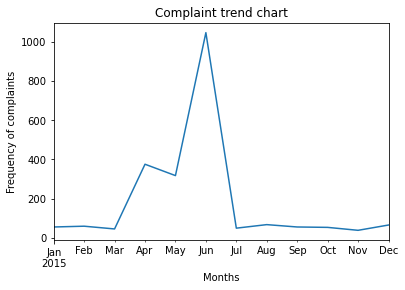

In [266]:
df.groupby(pd.Grouper(freq="M")).size().plot()             # Grouping the data on the basis of Monthly frequncy and plotting the graph
plt.xlabel("Months")
plt.ylabel("Frequency of complaints")
plt.title("Complaint trend chart")
plt.show()

The above graph shows that maximum complaints were in the month of June

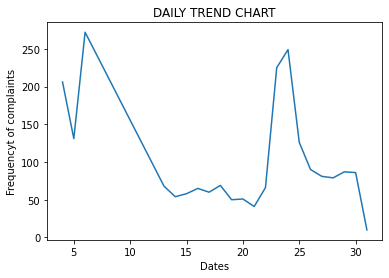

In [267]:
df.groupby("Date").size().plot()                # Grouping the data on the basis of date and plotting the graph
plt.xlabel("Dates")
plt.ylabel("Frequencyt of complaints")
plt.title("DAILY TREND CHART")
plt.show()

The above graph shows that maximum complaints were received between the days of 5th and 10th followed by between 20th and 25th 

In [268]:
df["Customer Complaint"]

Date_month_year
2015-04-22                        Comcast Cable Internet Speeds
2015-08-04         Payment disappear - service got disconnected
2015-04-18                                    Speed and Service
2015-07-05    Comcast Imposed a New Usage Cap of 300GB that ...
2015-05-26           Comcast not working and no service to boot
                                    ...                        
2015-02-04                                 Service Availability
2015-02-06           Comcast Monthly Billing for Returned Modem
2015-09-06                              complaint about comcast
2015-06-23               Extremely unsatisfied Comcast customer
2015-06-24                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

<AxesSubplot:>

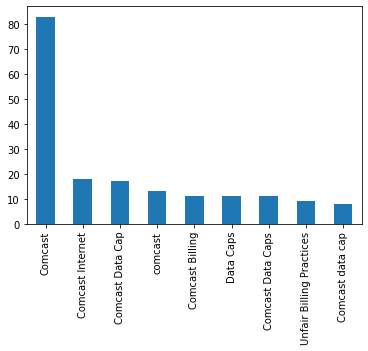

In [269]:
df['Customer Complaint'].value_counts()[:9].plot.bar()        # Plotting a bar graph based on the last 9 values

In [270]:
# Finding the count of complaints in whom string contains the keywords related to internet issues

internet_issues1=df[df['Customer Complaint'].str.contains("network")].count()    
internet_issues2=df[df['Customer Complaint'].str.contains("speed")].count()
internet_issues3=df[df['Customer Complaint'].str.contains("data")].count()
internet_issues4=df[df['Customer Complaint'].str.contains("internet")].count()
internet_issues = internet_issues1+internet_issues2+internet_issues3+internet_issues4
internet_issues

Ticket #                       374
Customer Complaint             374
Date                           374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
Month                          374
dtype: int64

In [271]:
# Finding the count of complaints in whom string contains the keywords related to billing issues

billing_issues1=df[df['Customer Complaint'].str.contains("bill")].count()
billing_issues2=df[df['Customer Complaint'].str.contains("billing")].count()
billing_issues3=df[df['Customer Complaint'].str.contains("charges")].count()
billing_issues = billing_issues1+billing_issues2+billing_issues3
billing_issues

Ticket #                       353
Customer Complaint             353
Date                           353
Time                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
Month                          353
dtype: int64

In [272]:
# Finding the count of complaints in whom string contains the keywords related to service issues


service_issues1=df[df['Customer Complaint'].str.contains("service")].count()
service_issues2=df[df['Customer Complaint'].str.contains("customer")].count()
service_issues = service_issues1+service_issues2
service_issues

Ticket #                       360
Customer Complaint             360
Date                           360
Time                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
Month                          360
dtype: int64

In [273]:
Total_issues = internet_issues+billing_issues+service_issues
Total_issues           # Total issues corresponding to internet,service and billing

Ticket #                       1087
Customer Complaint             1087
Date                           1087
Time                           1087
Received Via                   1087
City                           1087
State                          1087
Zip code                       1087
Status                         1087
Filing on Behalf of Someone    1087
Month                          1087
dtype: int64

In [274]:
df.count()

Ticket #                       2224
Customer Complaint             2224
Date                           2224
Time                           2224
Received Via                   2224
City                           2224
State                          2224
Zip code                       2224
Status                         2224
Filing on Behalf of Someone    2224
Month                          2224
dtype: int64

The total issues were 2224, issues related to internet, billing and service were 1087. The rest are other issues

In [275]:
df["Status"].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [276]:
df["Categorized_status"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df["Categorized_status"]       # Creating a new column with status categorized into open and closed

Date_month_year
2015-04-22    Closed
2015-08-04    Closed
2015-04-18    Closed
2015-07-05      Open
2015-05-26    Closed
               ...  
2015-02-04    Closed
2015-02-06    Closed
2015-09-06    Closed
2015-06-23    Closed
2015-06-24      Open
Name: Categorized_status, Length: 2224, dtype: object

In [277]:
df["Categorized_status"].unique()

array(['Closed', 'Open'], dtype=object)

In [278]:
df["State"].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [279]:
df1 = df[["State","Categorized_status"]]
df1

,State,Categorized_status
Date_month_year,,
2015-04-22,Maryland,Closed
2015-08-04,Georgia,Closed
2015-04-18,Georgia,Closed
2015-07-05,Georgia,Open
2015-05-26,Georgia,Closed
...,...,...
2015-02-04,Florida,Closed
2015-02-06,Michigan,Closed
2015-09-06,Michigan,Closed


In [280]:
df1 = df.groupby(["State","Categorized_status"]).size().unstack()    # Grouping based on state and categorized status
print(df1)

Categorized_status    Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

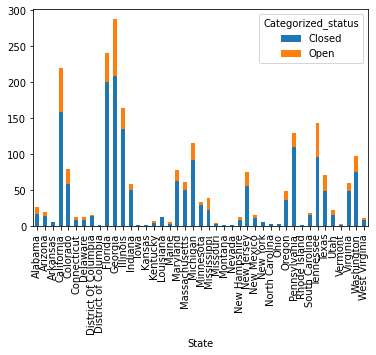

In [281]:
df1.plot.bar(stacked=True)           # Plotting the graph based on above data

The above graphs shows that Georgia has the highest number of complaints

In [282]:
df1.head(3)

Categorized_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN


In [283]:
df1["percent_unresolved"] = df1["Open"]/(df1["Closed"]+df1["Open"])*100
df1["percent_unresolved"].sort_values(ascending=False)    # Finding the percent of unresolved complaints by state and putting them in descending order

State
Kansas                  50.000000
Kentucky                42.857143
Mississippi             41.025641
Maine                   40.000000
Alabama                 34.615385
Vermont                 33.333333
Delaware                33.333333
New Hampshire           33.333333
Tennessee               32.867133
Texas                   30.985915
Arizona                 30.000000
Georgia                 27.777778
California              27.727273
Colorado                27.500000
Utah                    27.272727
West Virginia           27.272727
New Mexico              26.666667
Oregon                  26.530612
New Jersey              25.333333
Missouri                25.000000
Connecticut             25.000000
Washington              23.469388
Michigan                20.000000
Maryland                19.230769
Virginia                18.333333
Massachusetts           18.032787
Illinois                17.682927
South Carolina          16.666667
Florida                 16.250000
Pennsylv

Above output shows that kansas has the highest percentage of unresolved complaints

In [284]:
df["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [285]:
CustomerCareCall_resolved = df.groupby(["Categorized_status"])["Received Via"].value_counts().loc["Closed","Customer Care Call"]   # Closed complaints received via customer care calls
Internet_resolved = df.groupby(["Categorized_status"])["Received Via"].value_counts().loc["Closed","Internet"]                     # Closed complaints received via internet

In [286]:
Total_Closed = (df["Categorized_status"] =="Closed").sum()
Total_Closed            # Total closed tickets

1707

In [287]:
percent_CustomerCareCall_resolved = CustomerCareCall_resolved/Total_Closed*100
percent_CustomerCareCall_resolved           # Percent of complaints received via customer care calls among resolved complaints

50.61511423550088

In [288]:
percent_Internet_resolved = Internet_resolved/Total_Closed*100
percent_Internet_resolved                  # Percent of complaints received via internet among resolved complaints      

49.38488576449912

The above output shows that out of all resolved complaints 50.61% Complaints were of those received from Customer Care Call and 49.39% were of those received via internet.